In [1]:
import math
import matplotlib.pylab as plt 
import matplotlib.axes
import numpy as np 

In [32]:
h = 120
l = 3
l_0 = 1
c = 1.7
side = 1

In [33]:
def visualise(current_fi):    
    x = np.linspace(-1,1,100)

    plt.figure(figsize=(8,8))
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    plt.axvline(x = 0, ymin=-1, ymax=1, color ="black")
    plt.axhline(y = 0, xmin=-1, xmax=1, color ="black")
    plt.plot(x, x*math.atan2(current_fi, x[x.shape[0]-1]))
    plt.show()

In [34]:
def get_sin_fi(h, l, l_0, c):
    fi = c*math.sqrt(l_0*h)/l-l_0
    #sin_fi = math.sin(fi)
    
    return fi 

In [35]:
def coin_fall(h, l, l_0, c):
    k = 0
    for h_delta in range(h, 0, -1):
        fi = get_sin_fi(h_delta, l, l_0, c)
        sin_fi = math.sin(fi)
        print(sin_fi)
        visualise(fi)
    
    return sin_fi

In [36]:
def get_coin_side(sin_fi, side):
    resutl = 0.5*(1 + math.copysign(1, sin_fi*side))
    return int(resutl)

-0.8799053622401659


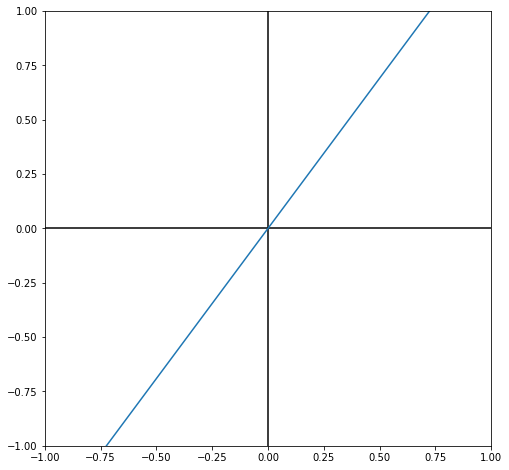

-0.8919237321115355


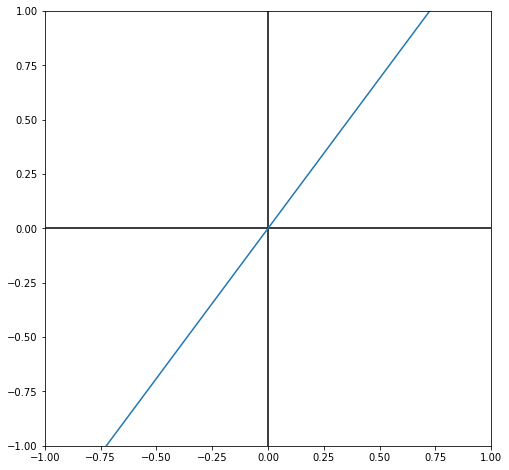

-0.9033897597874545


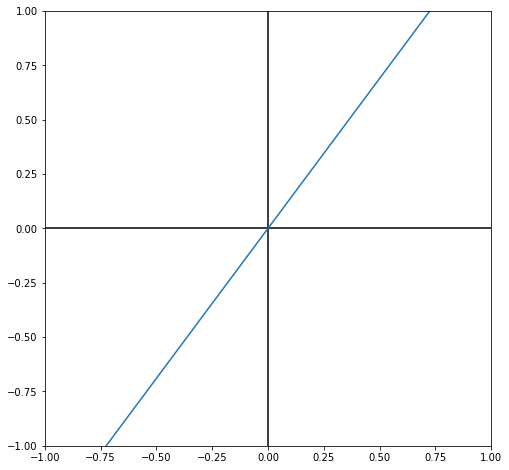

-0.9142885928440231


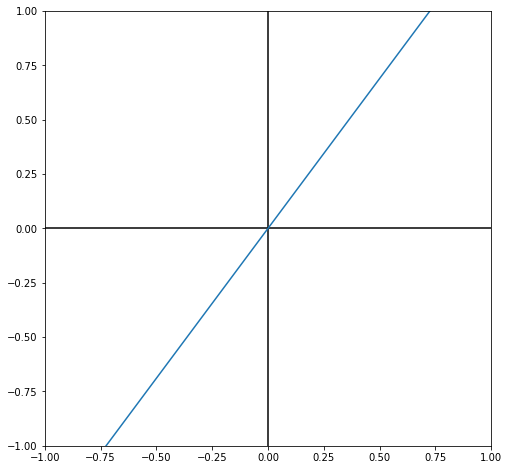

-0.924605450832586


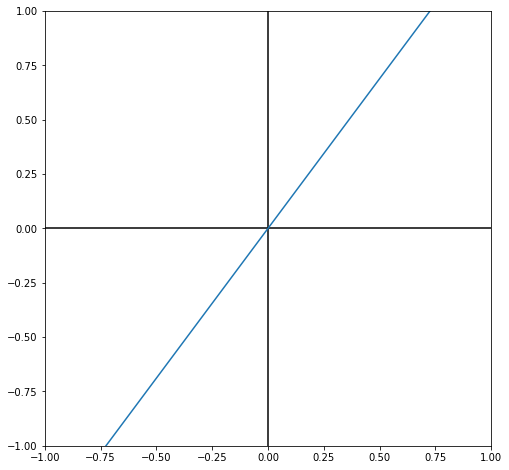

-0.9343256377067232


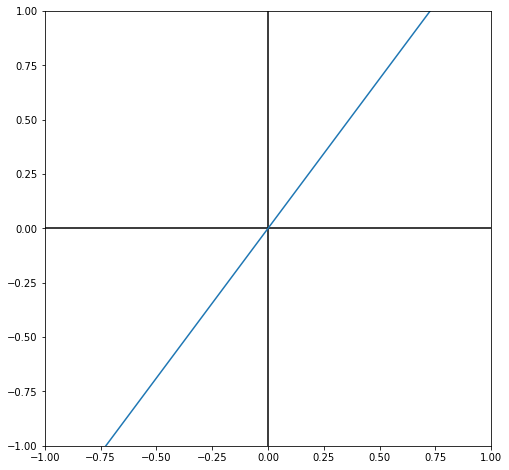

-0.9434345546775199


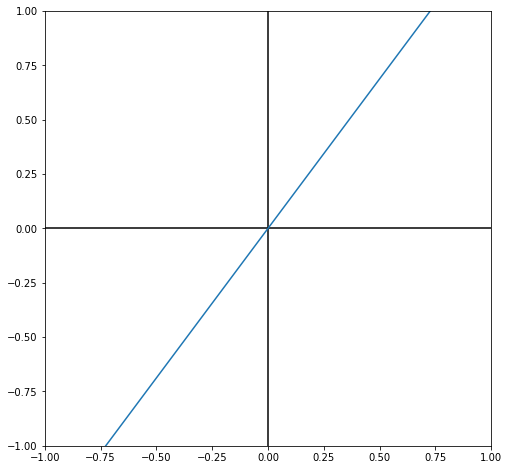

-0.951917713508744


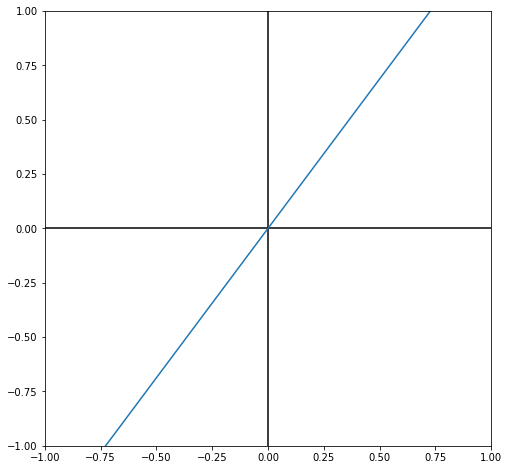

-0.9597607502639248


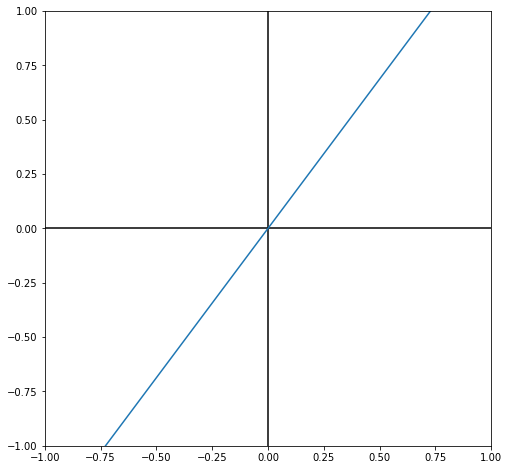

-0.9669494395176969


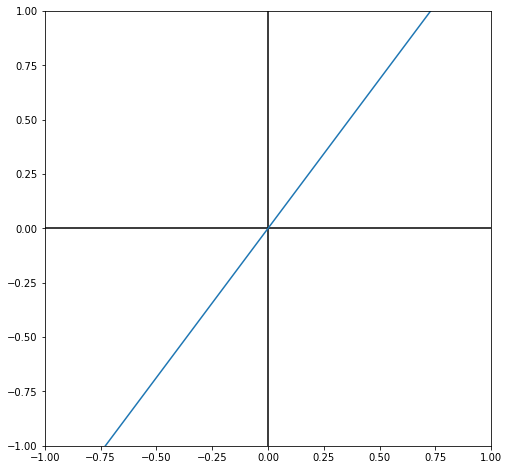

-0.9734697090441663


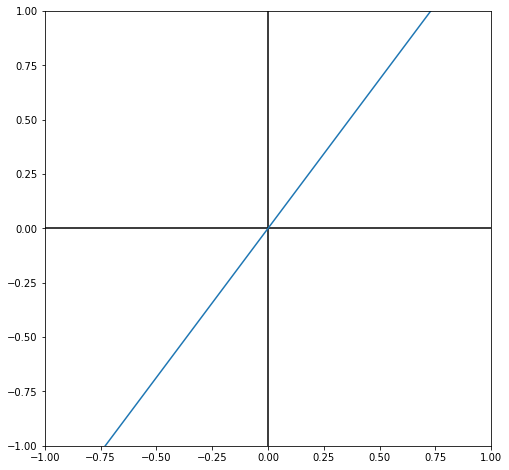

-0.9793076549954615


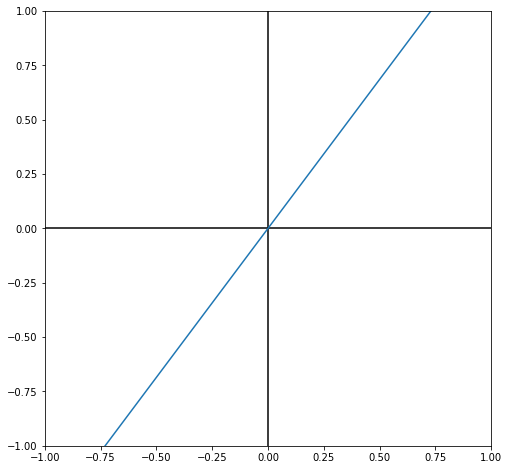

-0.9844495575840495


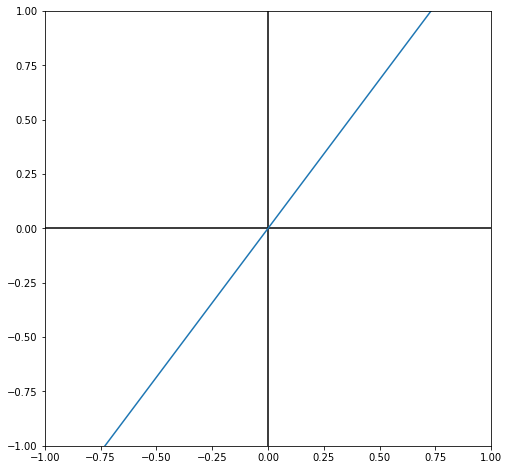

-0.988881897282851


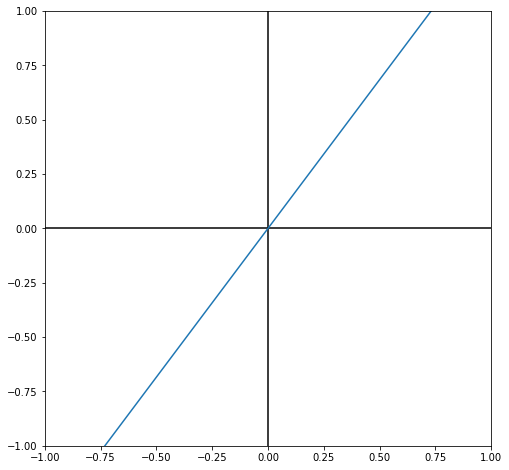

-0.992591371557652


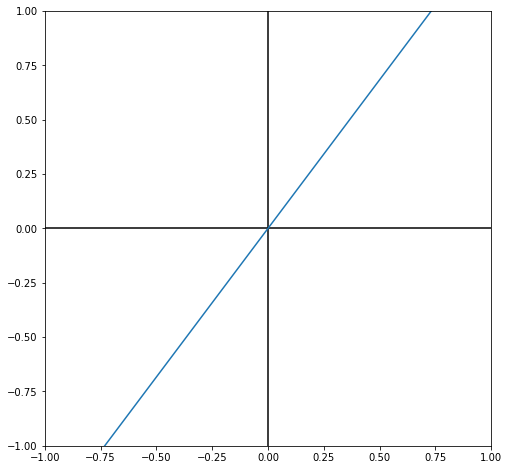

-0.9955649121467866


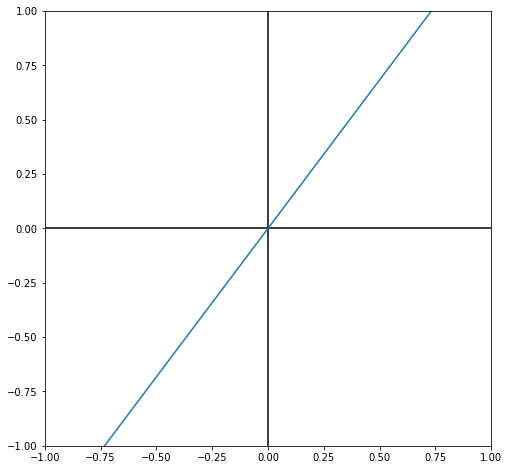

-0.9977897029035904


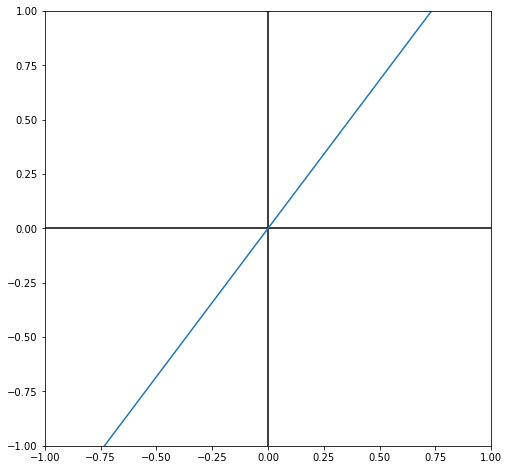

-0.9992531982176484


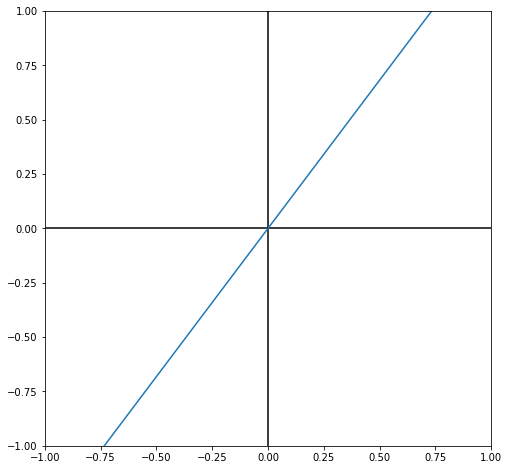

-0.9999431420314259


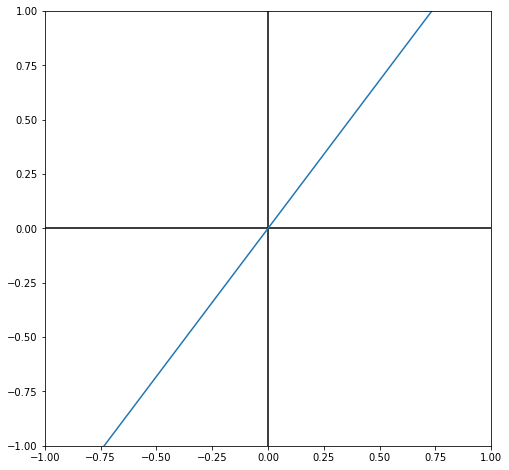

-0.9998475874694625


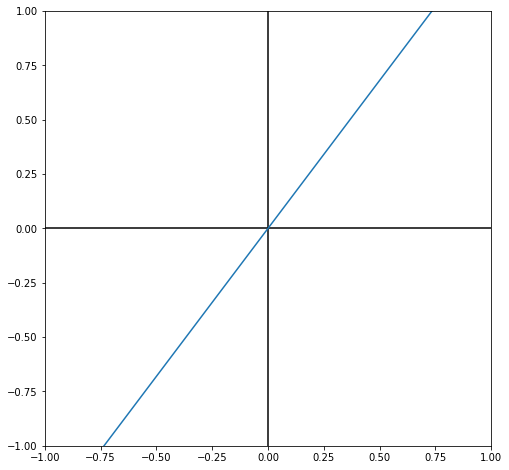

-0.9989549170979283


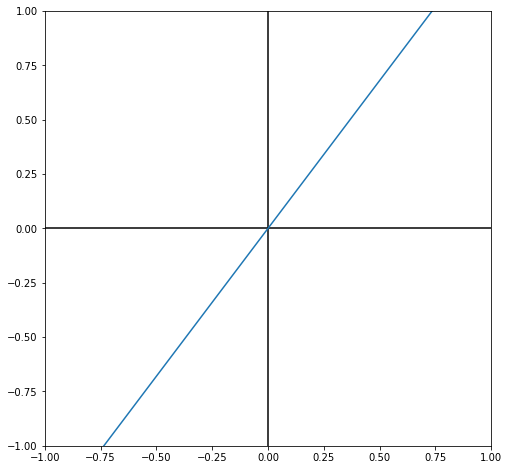

-0.997253863832994


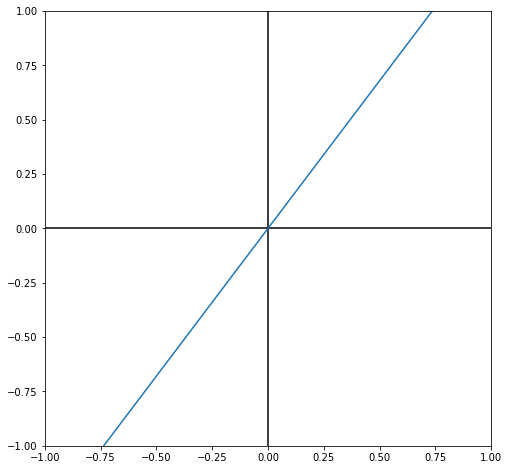

-0.9947335325171529


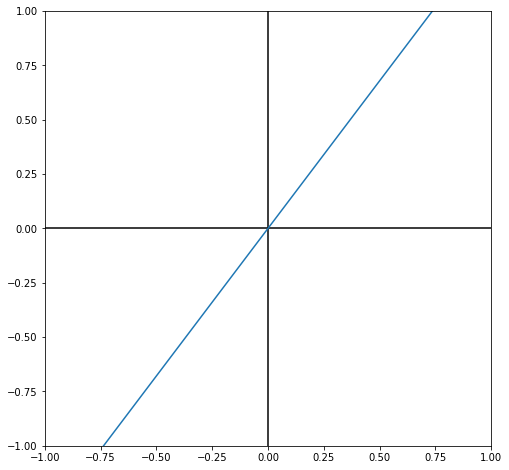

-0.9913834221833593


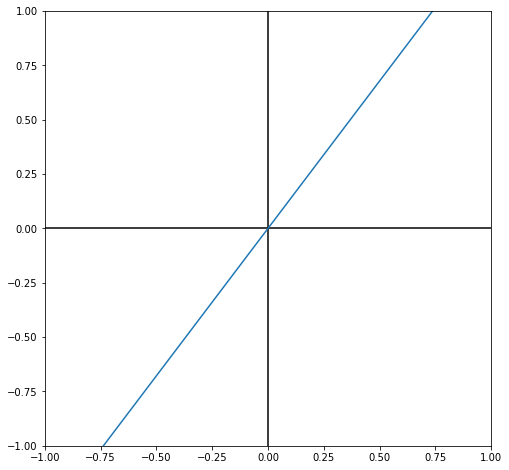

-0.9871934490276078


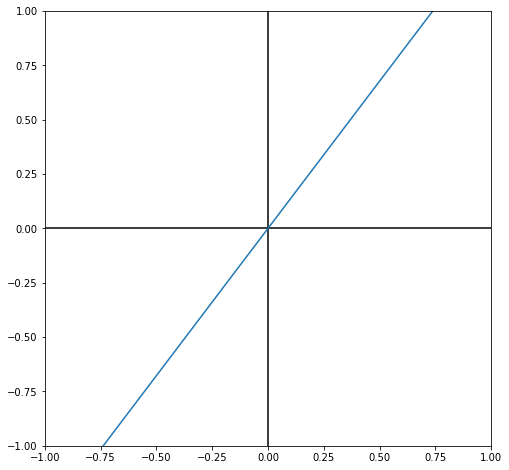

-0.9821539701113888


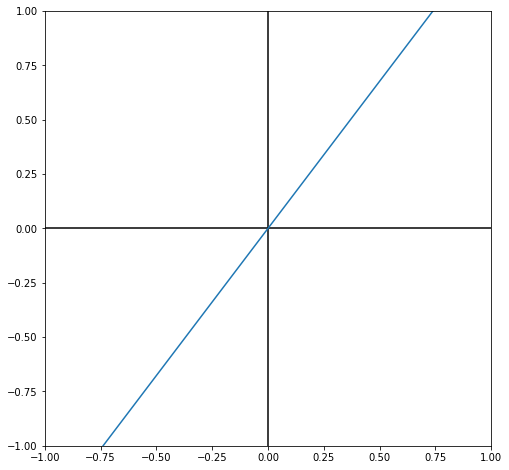

-0.9762558078163036


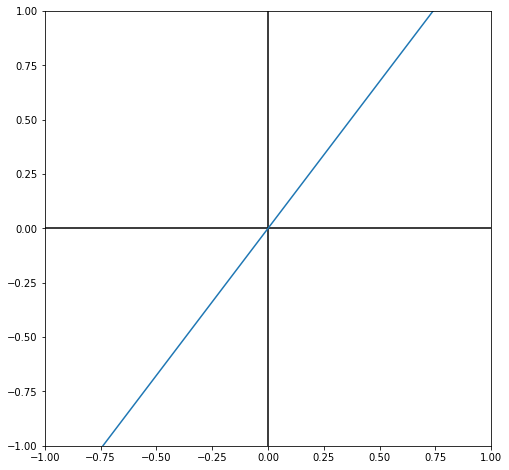

-0.9694902750740245


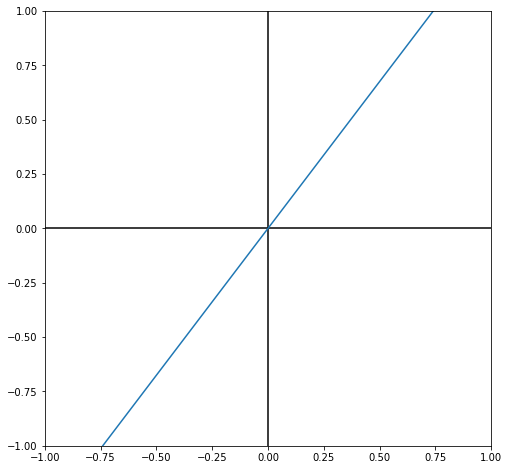

-0.961849201395742


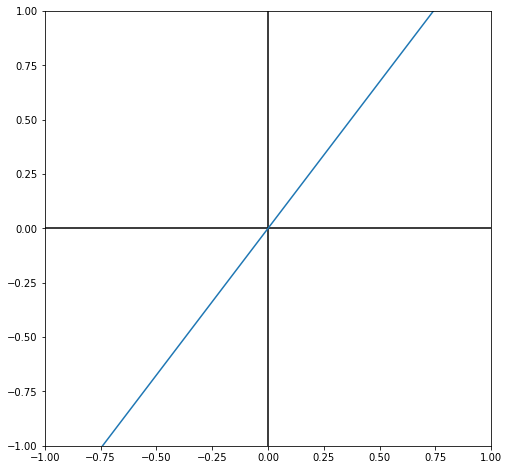

-0.9533249597262469


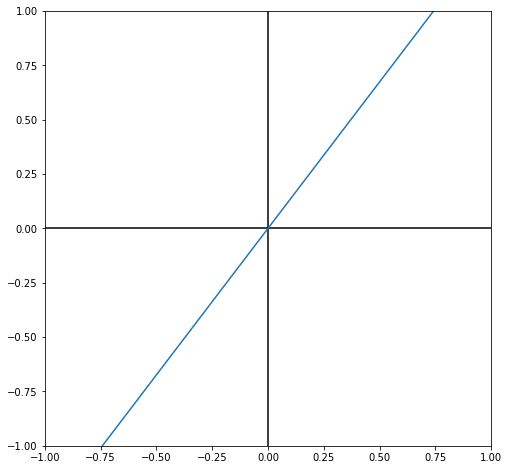

-0.94391049414887


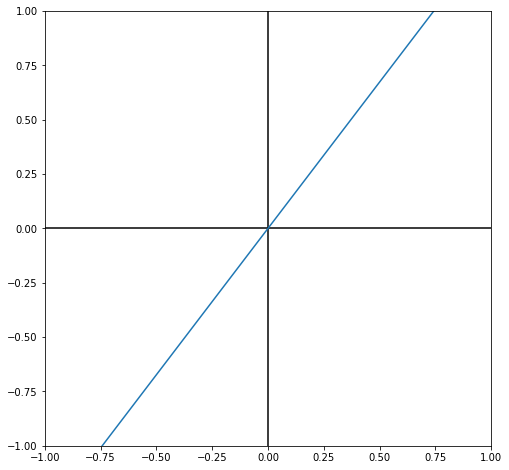

-0.933599348468642


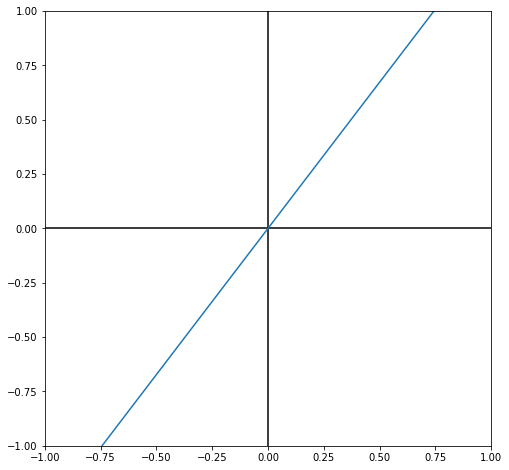

-0.9223856957022414


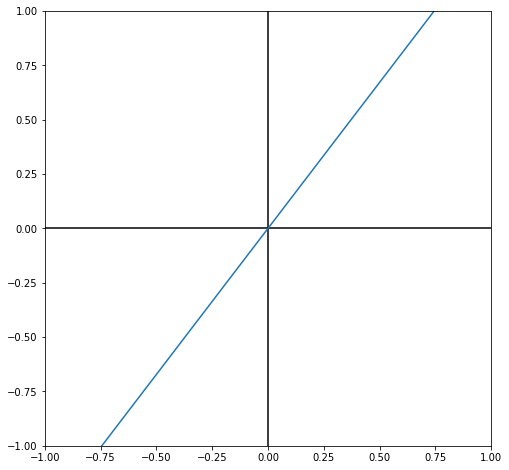

-0.9102643685045867


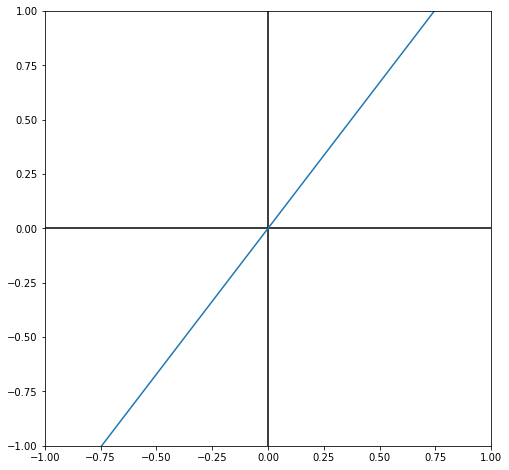

-0.8972308905633


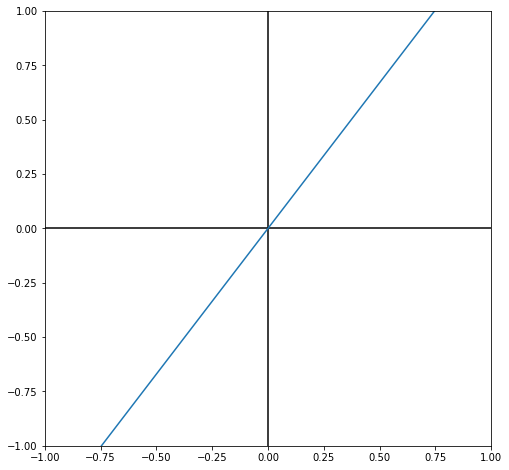

-0.8832815089937323


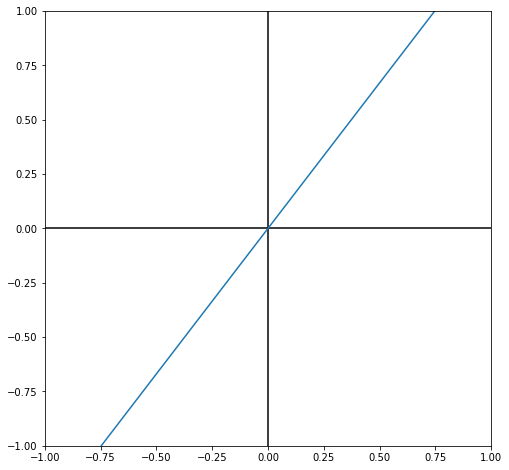

-0.8684132277687969


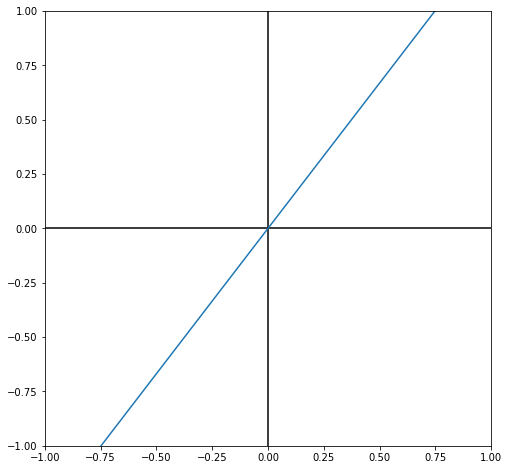

-0.8526238422195171


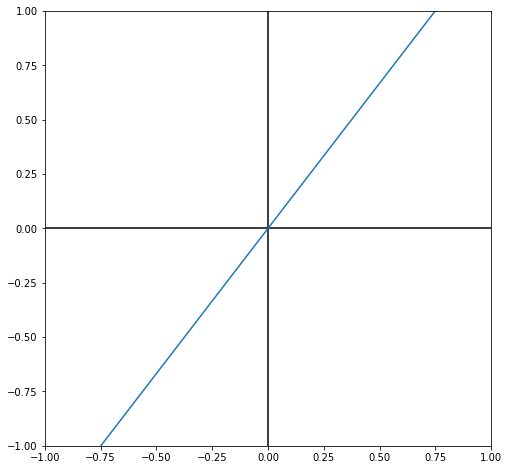

-0.8359119746439974


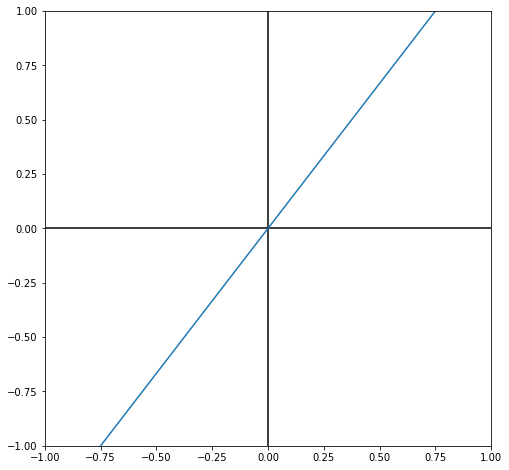

-0.8182771110644103


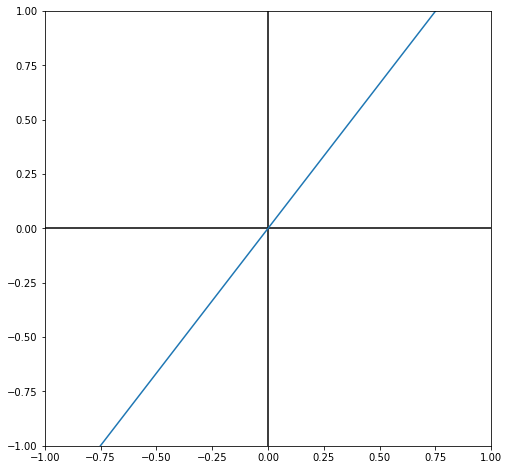

-0.7997196391736588


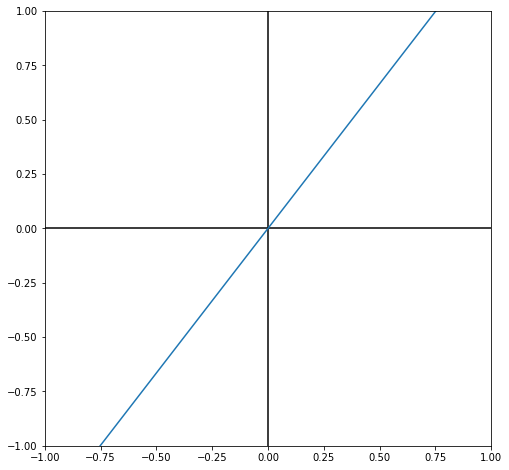

-0.780240887515552


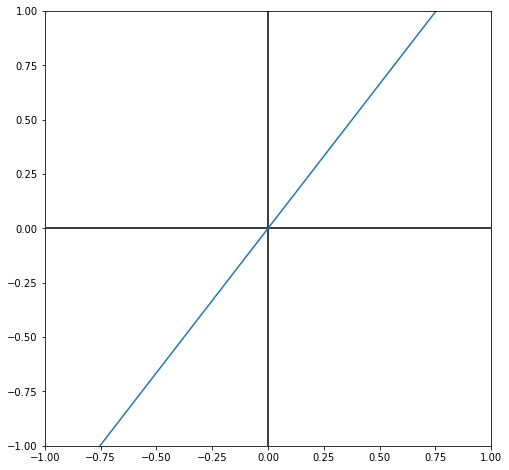

-0.7598431659447198


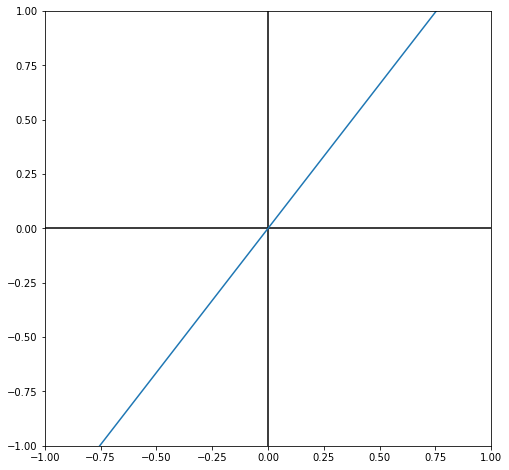

-0.7385298074150028


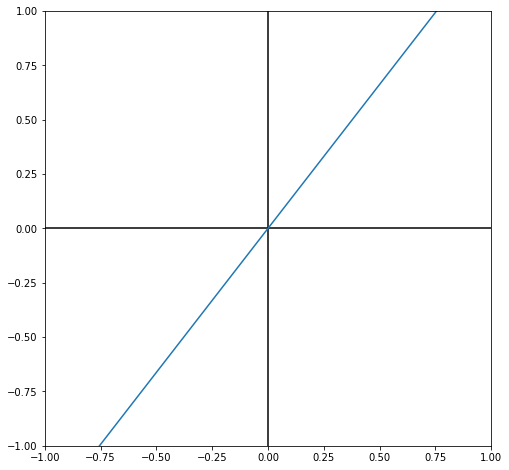

-0.7163052111478206


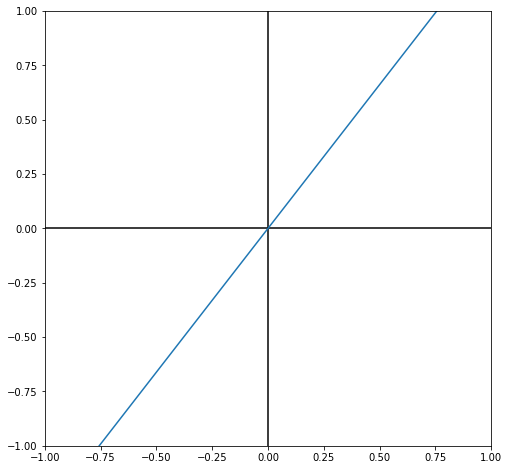

-0.6931748872349615


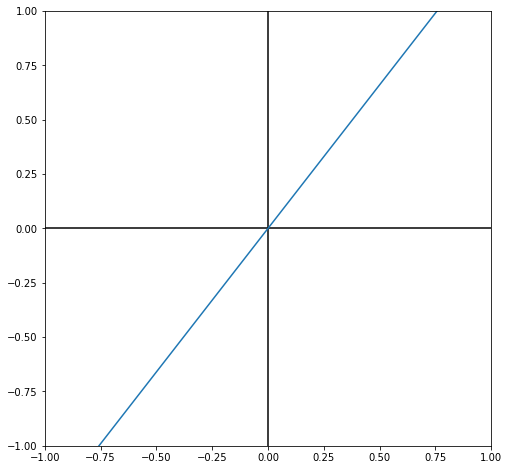

-0.6691455027334318


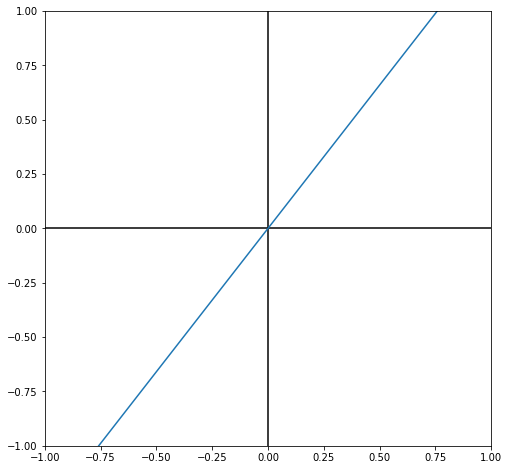

-0.6442249293134787


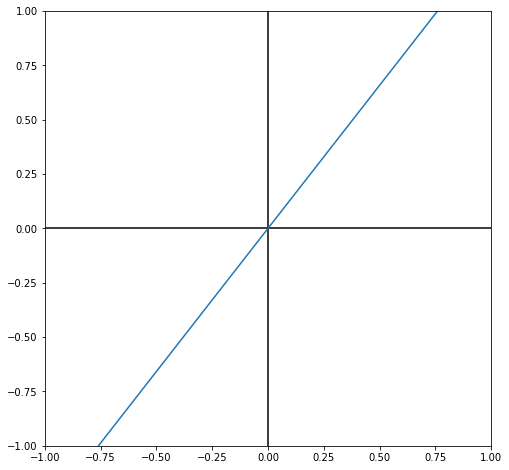

-0.6184222925246032


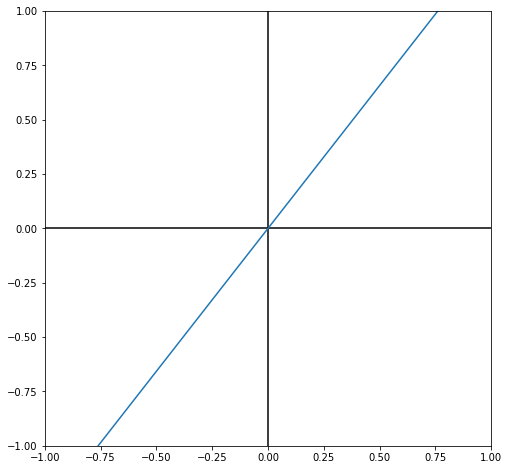

-0.5917480227484995


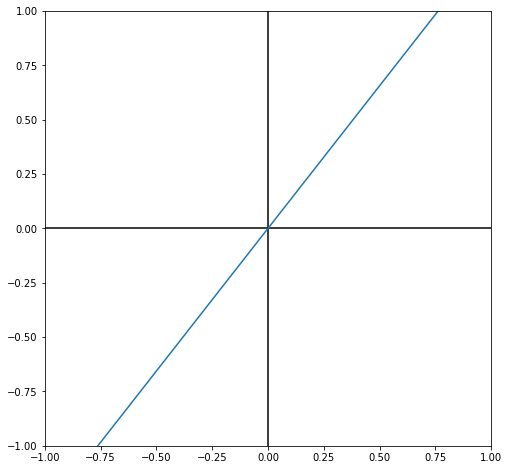

-0.5642139079122247


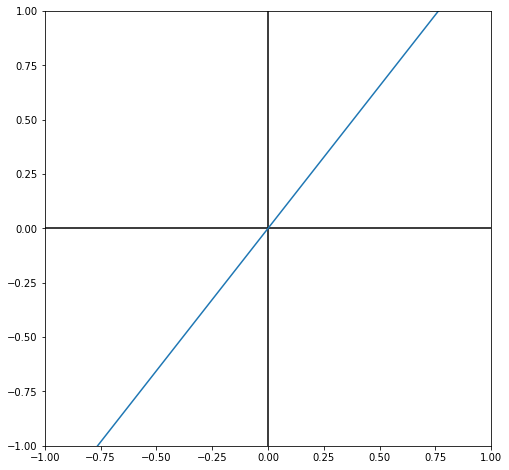

-0.5358331480397477


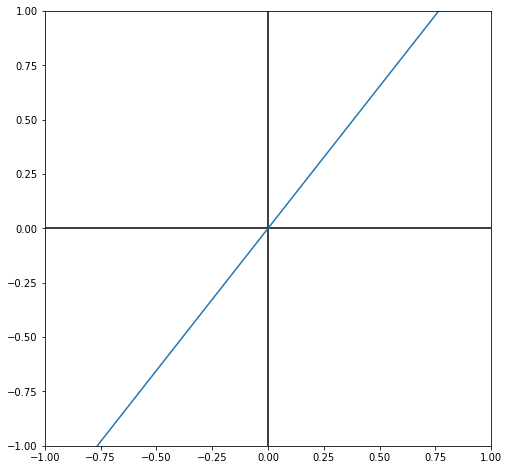

-0.5066204117252296


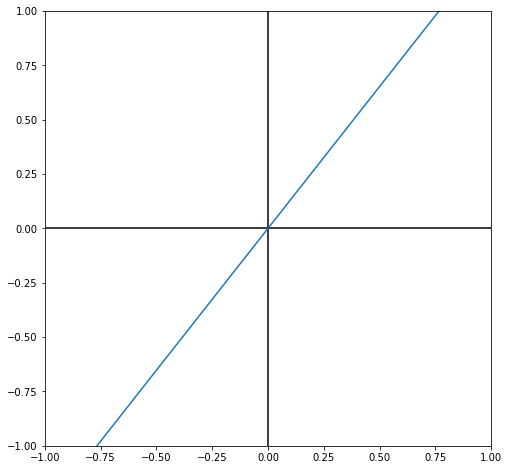

-0.4765918946171549


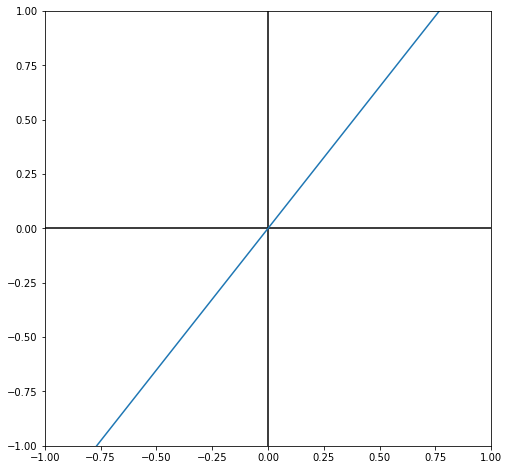

-0.44576538000864374


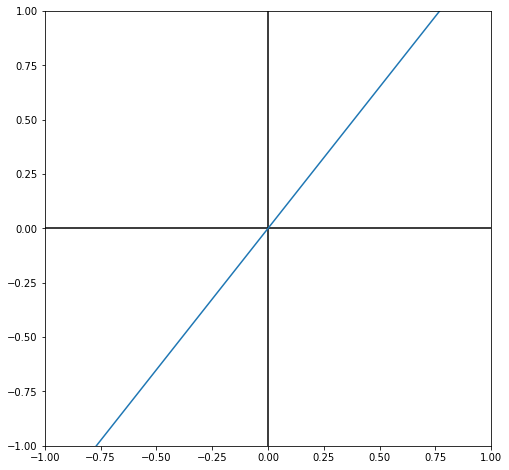

-0.4141603016361695


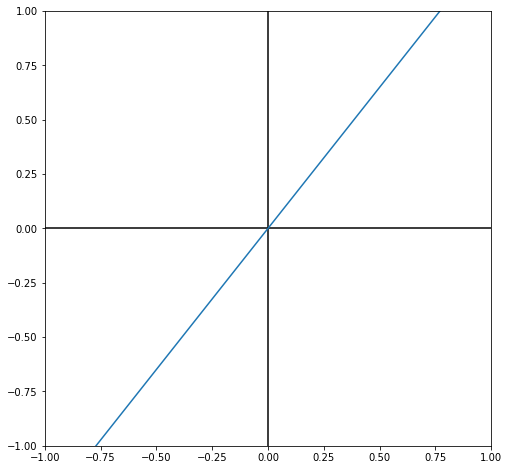

-0.38179780879641134


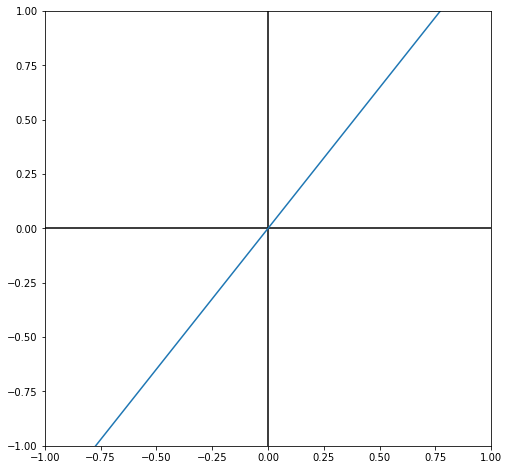

-0.34870083389922923


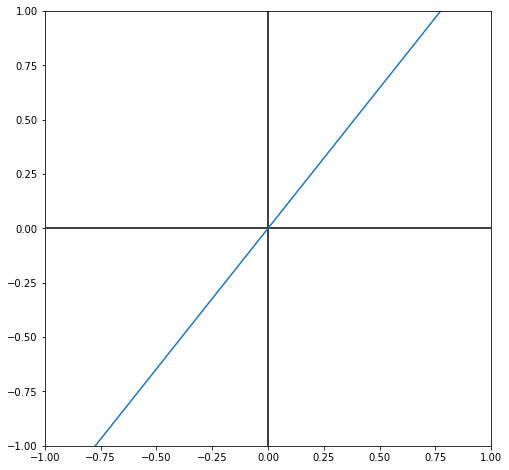

-0.31489416258388964


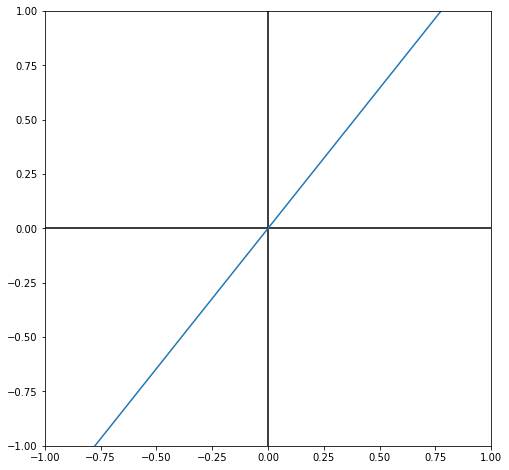

-0.280404506535685


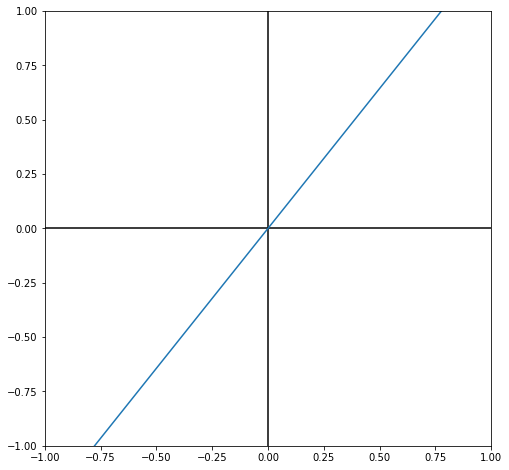

-0.24526057915122276


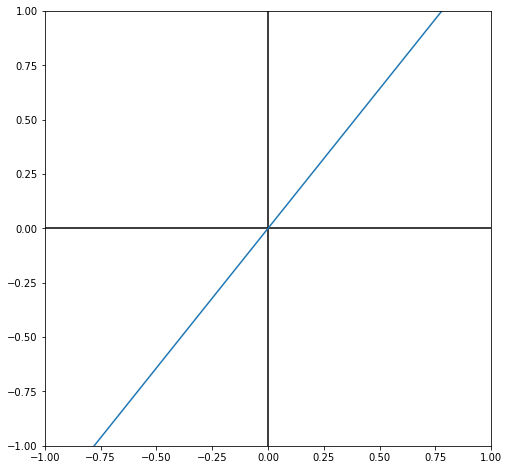

-0.20949317421293445


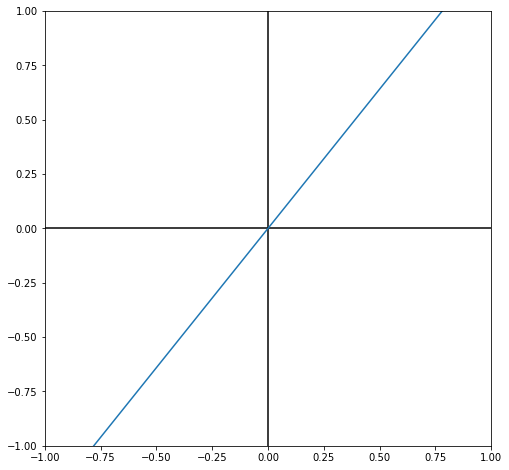

-0.17313524774705427


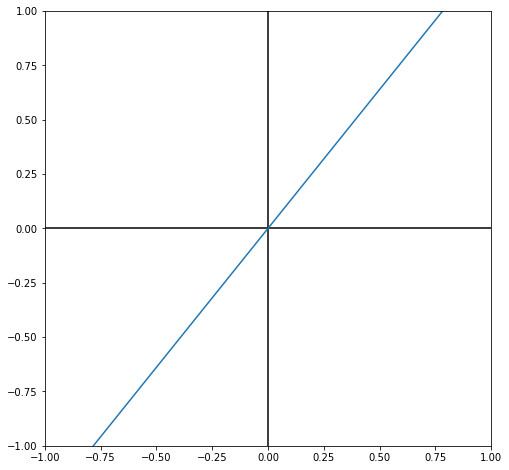

-0.13622200325444944


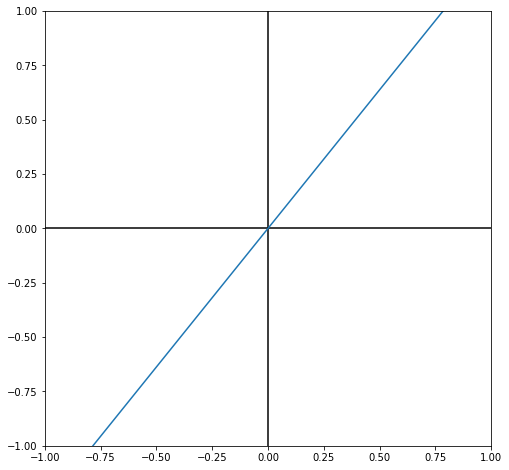

-0.09879098052065706


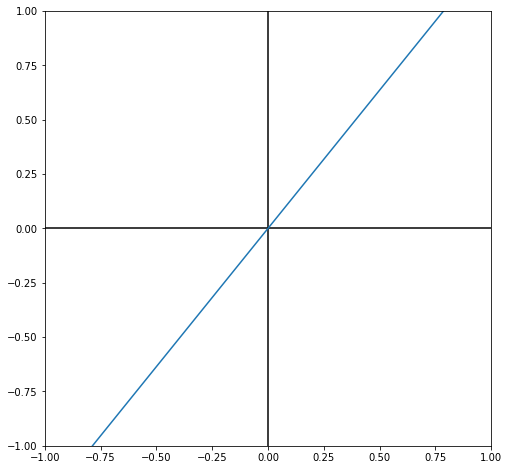

-0.060882148230351985


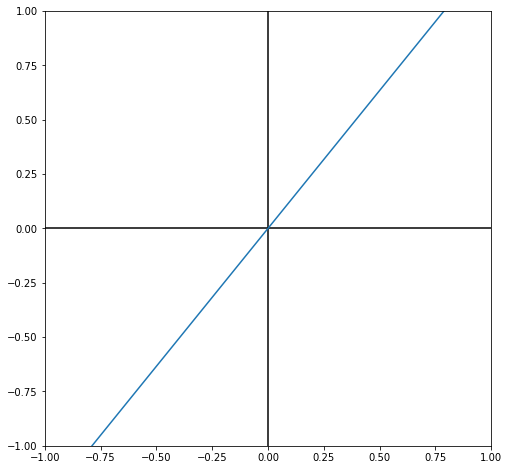

-0.022538000632659993


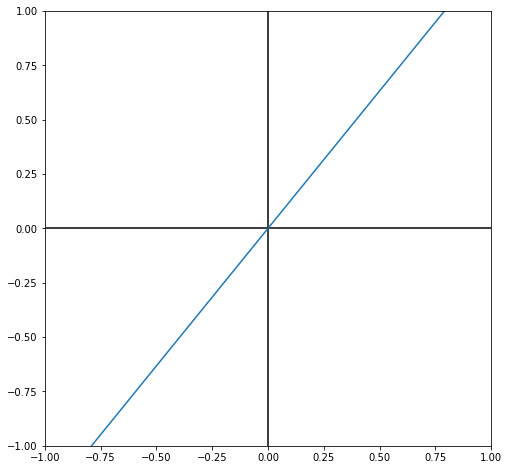

0.016196341472528387


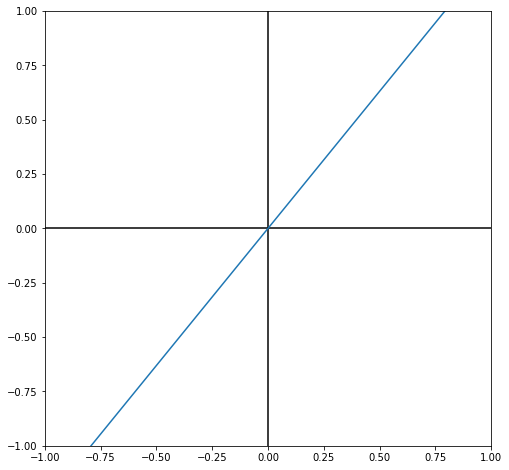

0.055273025130378385


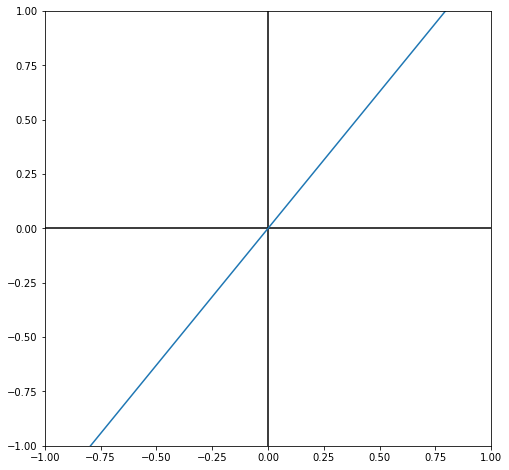

0.09464135468204683


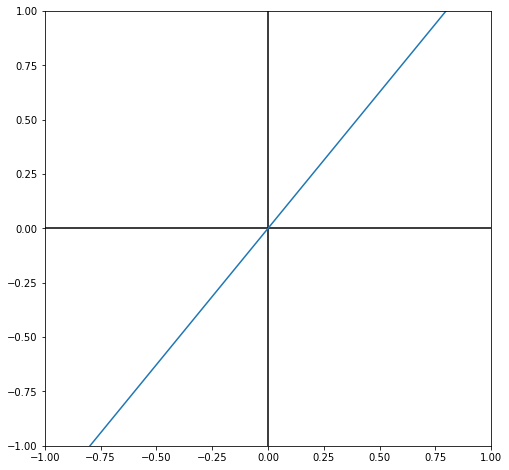

0.13424767590967876


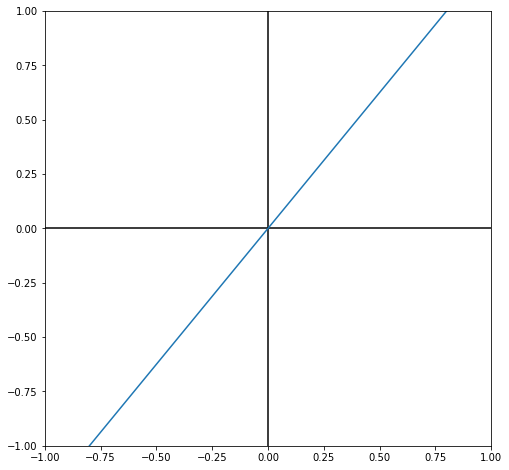

0.1740352544757625


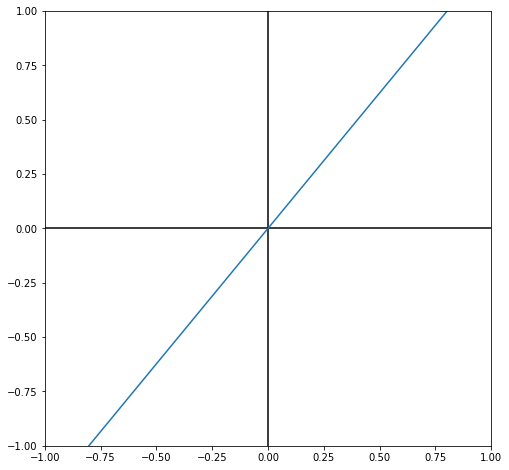

0.2139441482132599


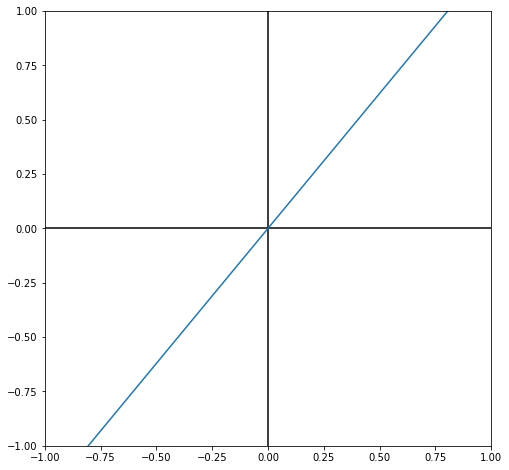

0.2539110727728445


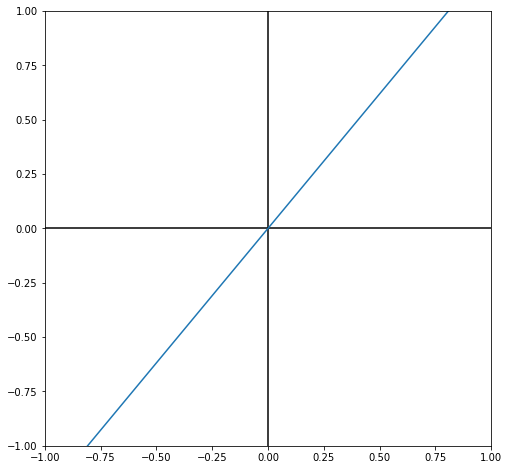

0.29386926007637054


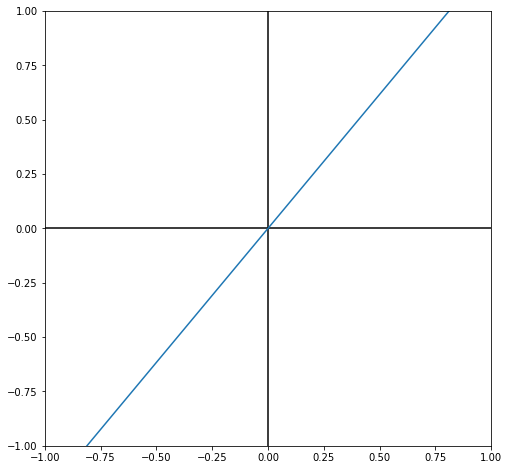

0.33374830896000274


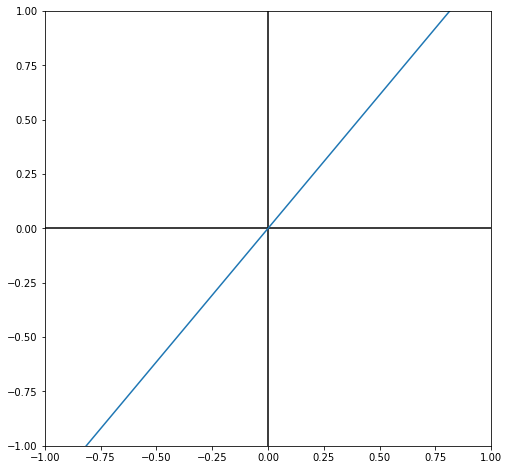

0.37347402731489954


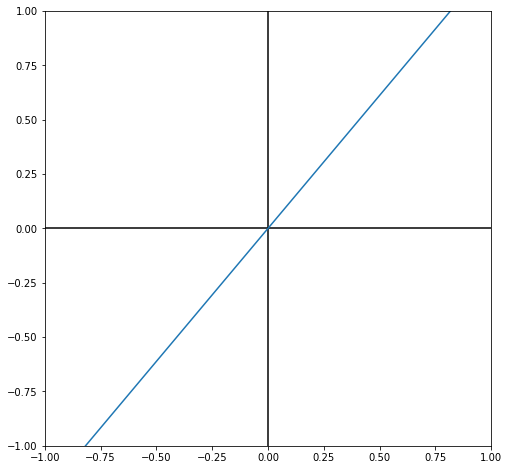

0.4129682649460726


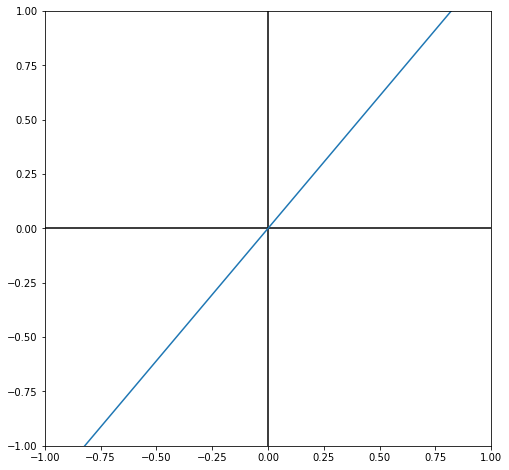

0.45214873626896196


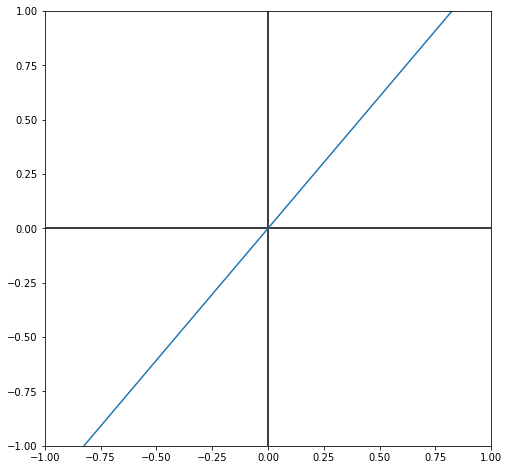

0.49092883184568065


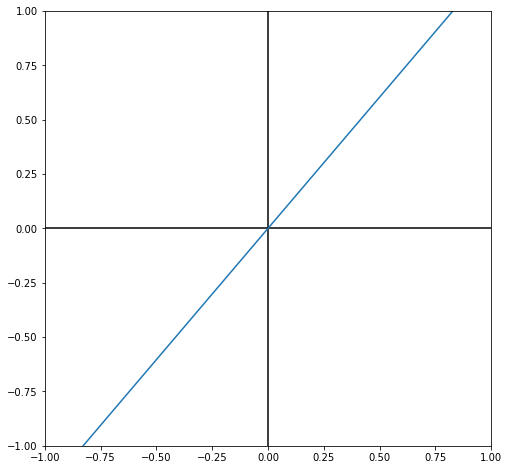

0.5292174176256291


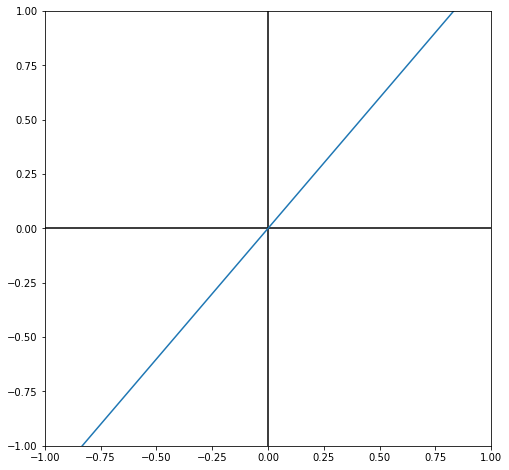

0.566918620594328


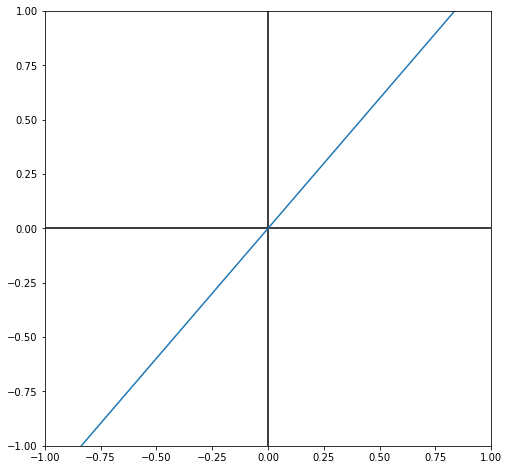

0.6039315993449579


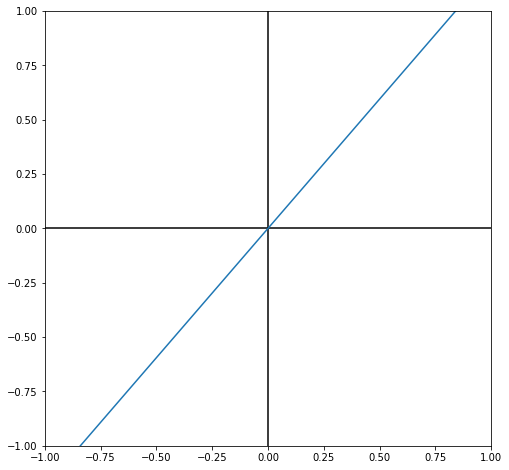

0.6401502978633213


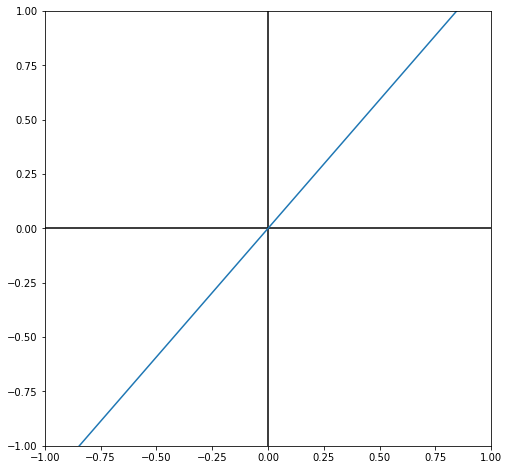

0.675463180551151


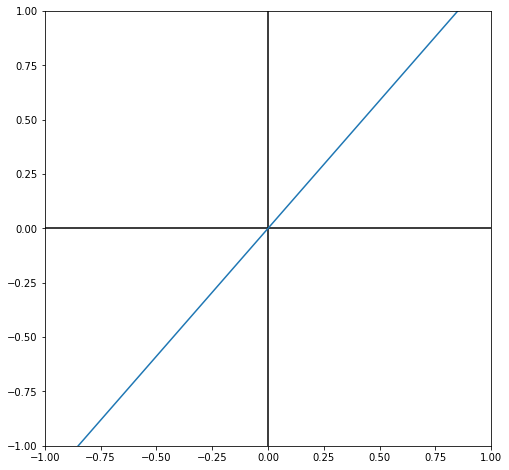

0.7097529461955971


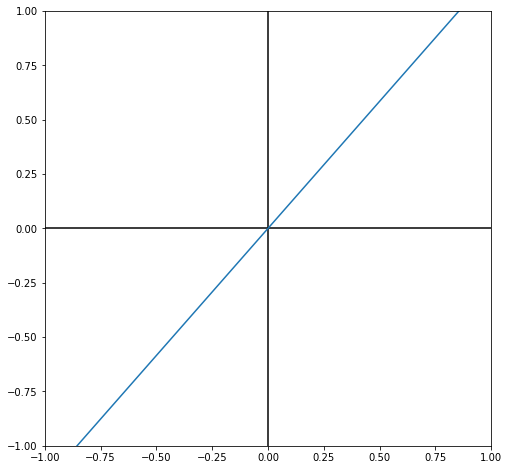

0.7428962182124172


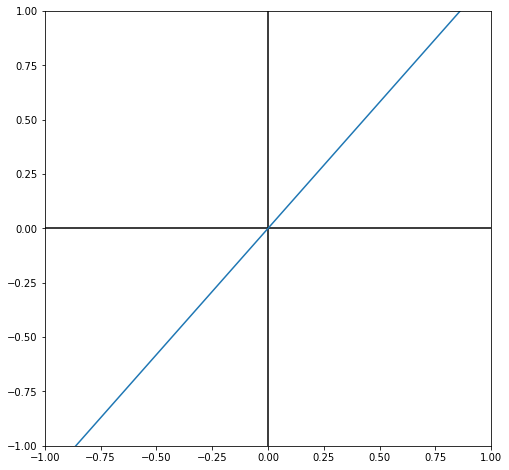

0.7747632080319068


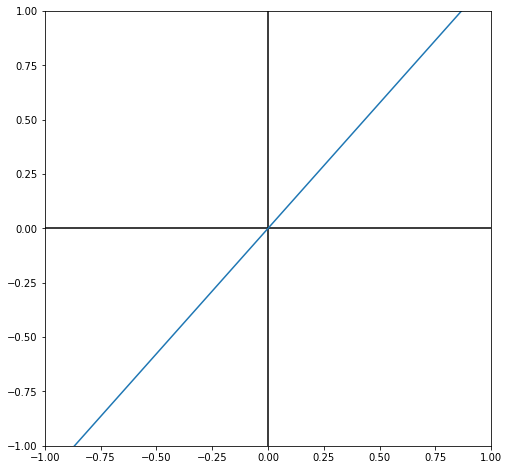

0.8052173479407317


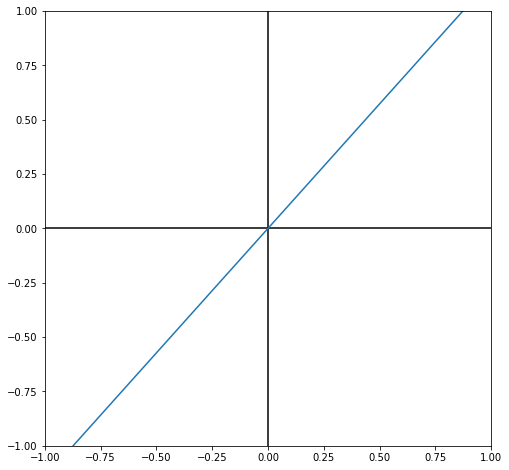

0.8341148890148582


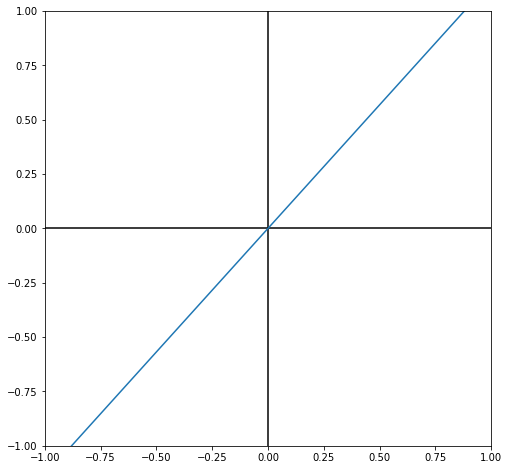

0.8613044589467561


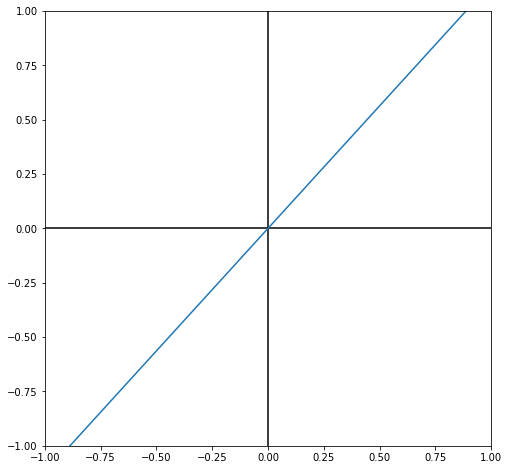

0.8866265735421441


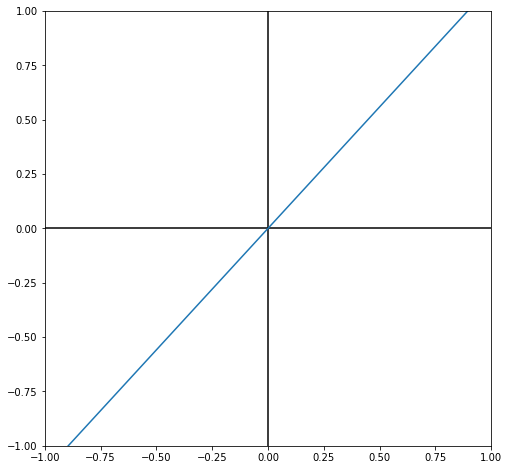

0.9099130943826246


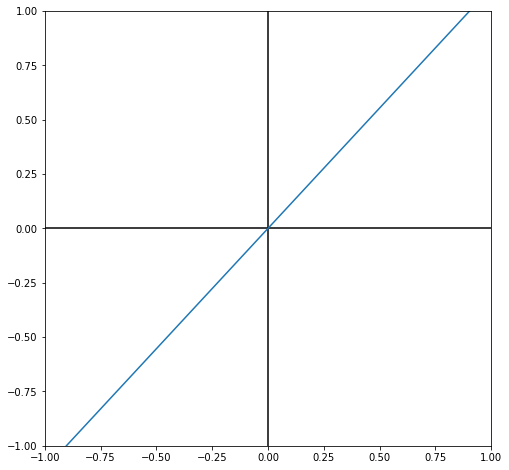

0.9309866235474251


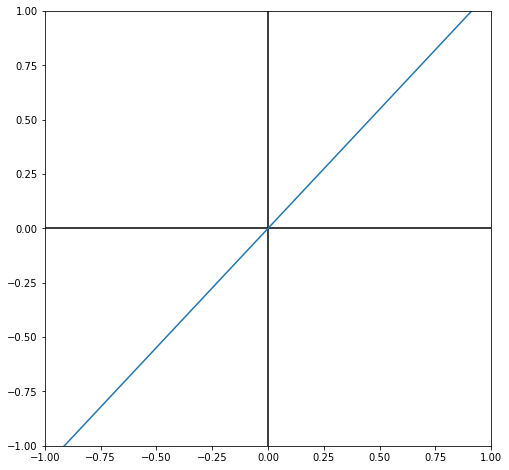

0.9496598242617375


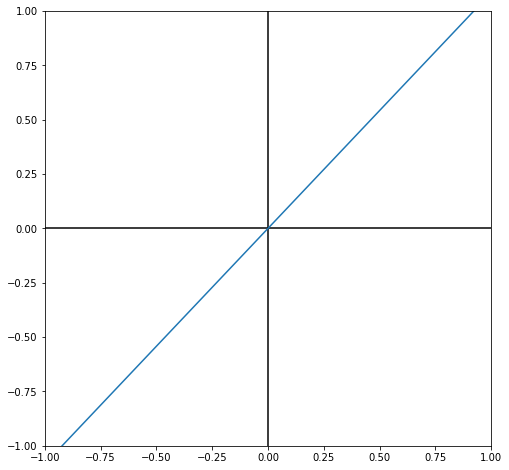

0.9657346537574997


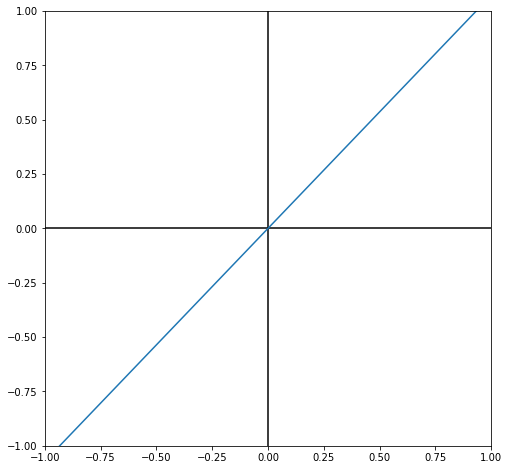

0.9790014913121241


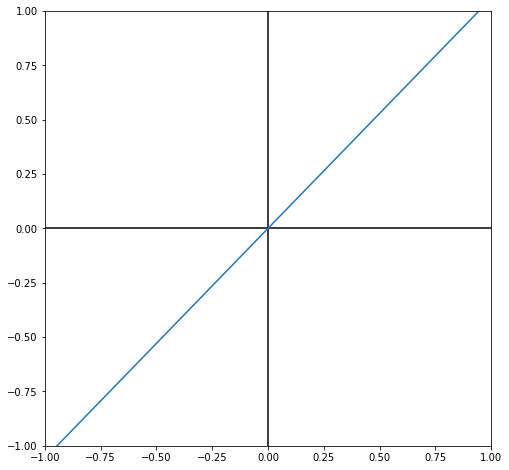

0.9892381401180643


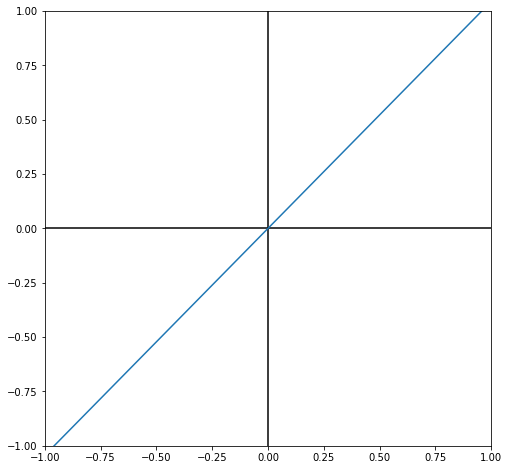

0.9962086759752145


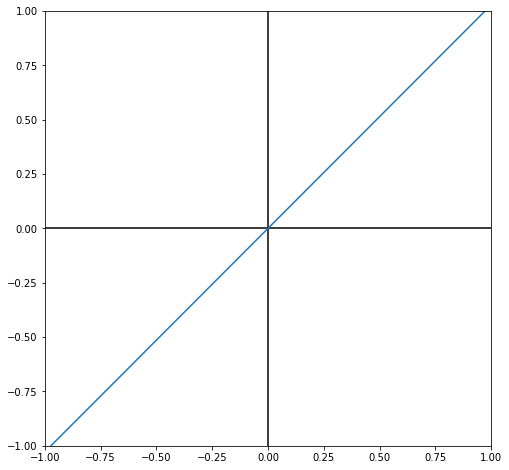

0.9996621082819421


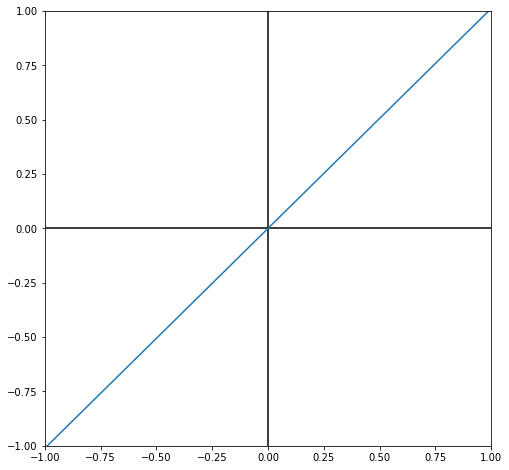

0.9993308086968176


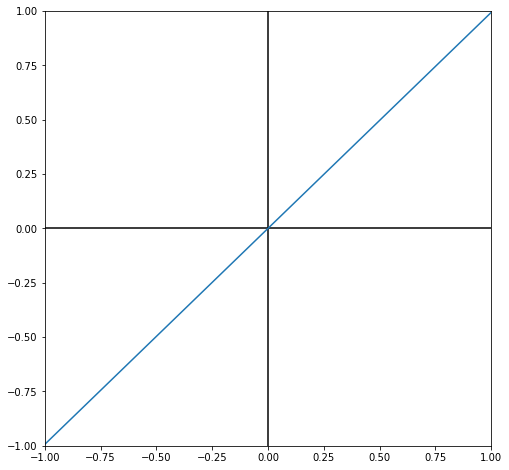

0.9949286490769047


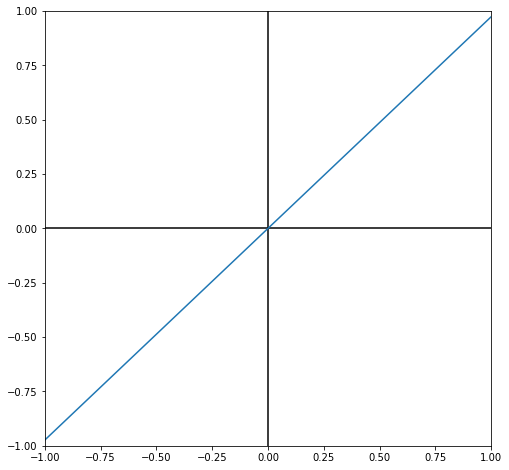

0.9861487712646663


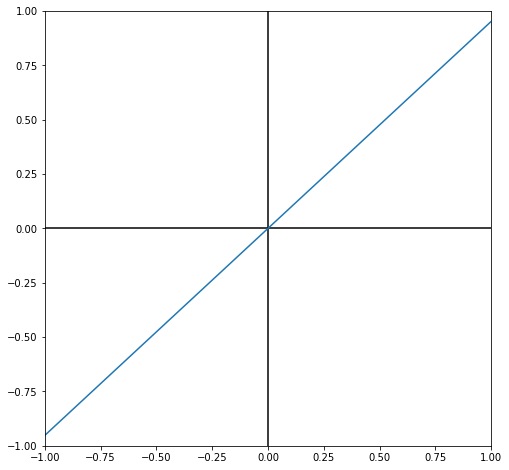

0.9726608845512072


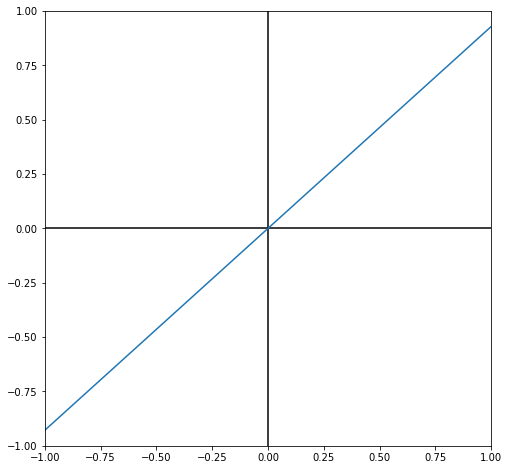

0.9541079483928832


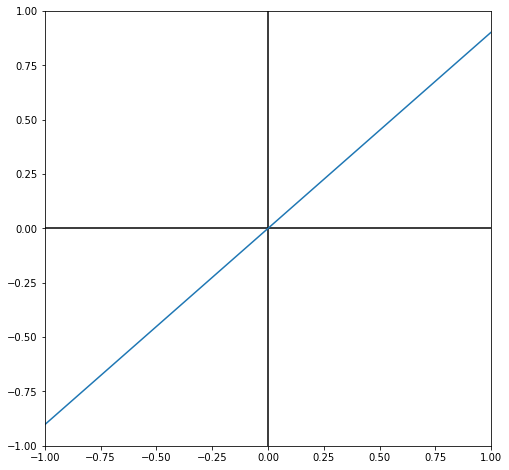

0.930102042166255


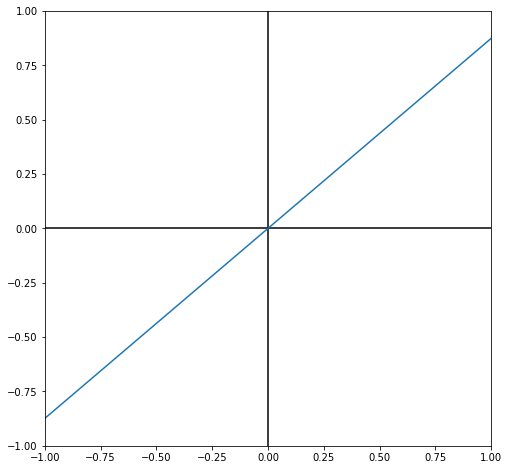

0.9002191405707619


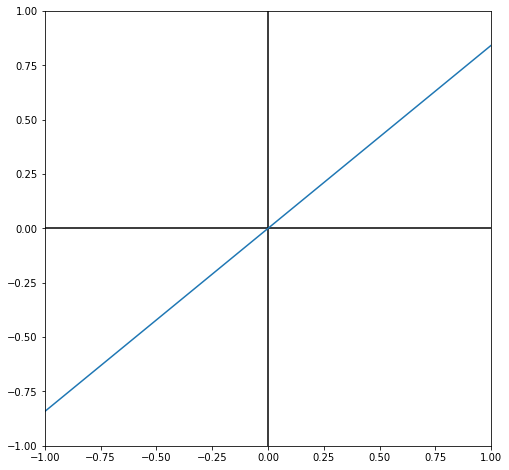

0.8639923862153255


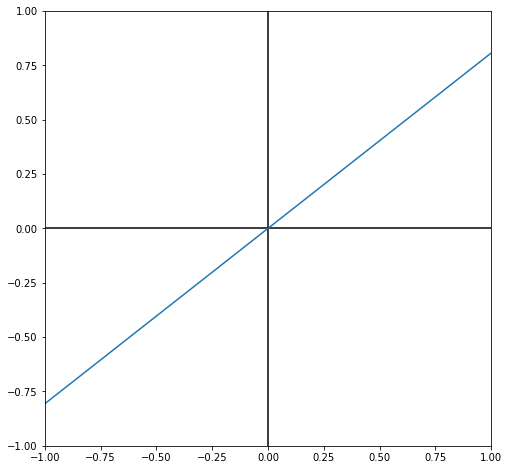

0.8209032513463687


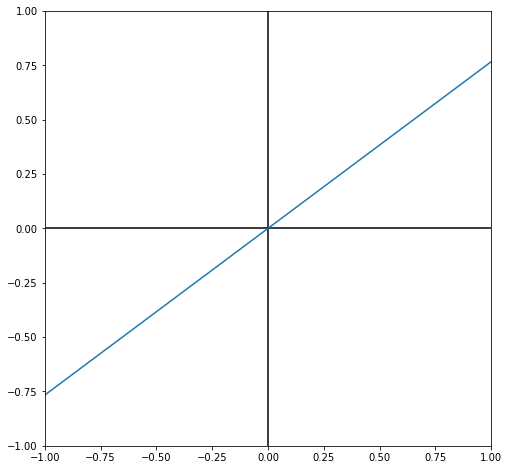

0.7703696572035402


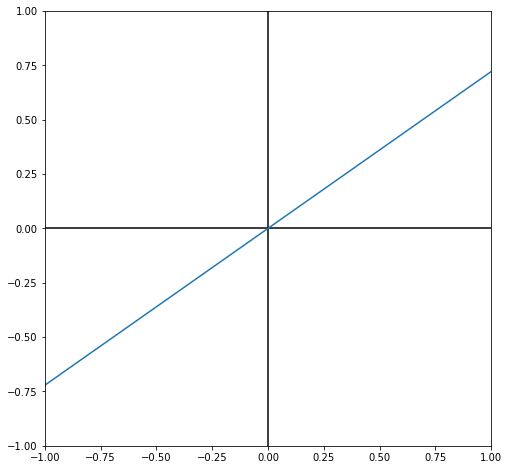

0.711729575918247


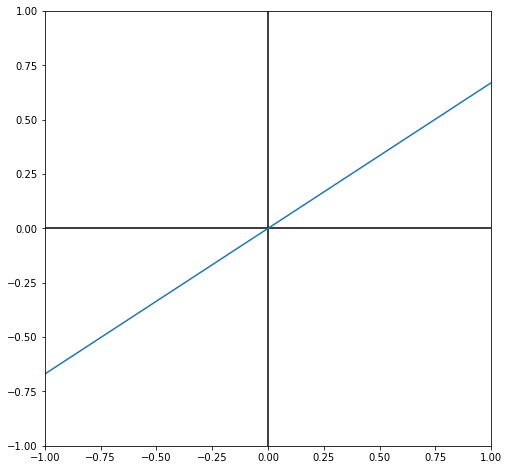

0.644217687237691


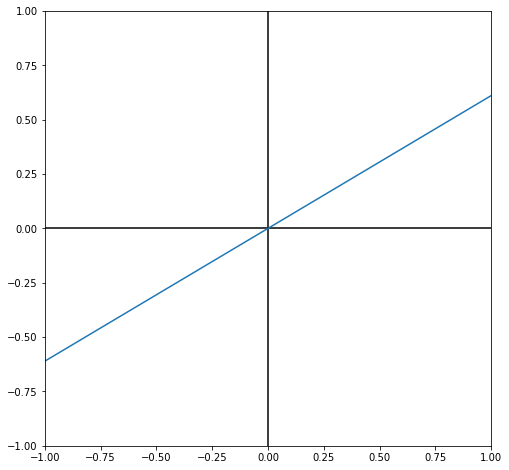

0.5669309080995772


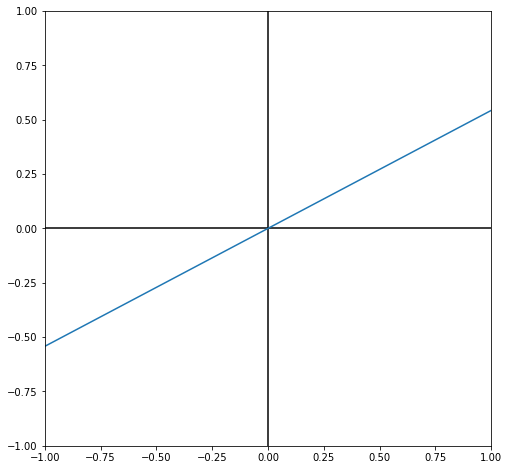

0.47877518532387153


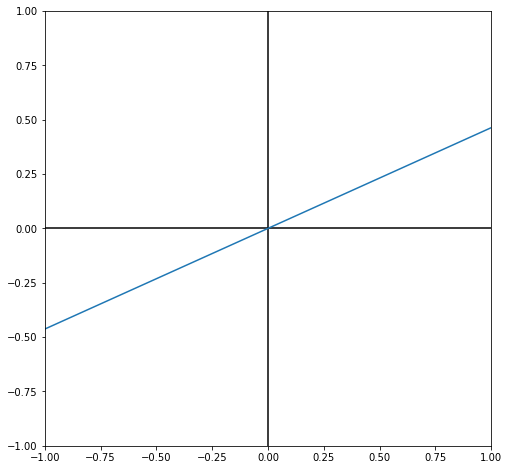

0.3783787404985812


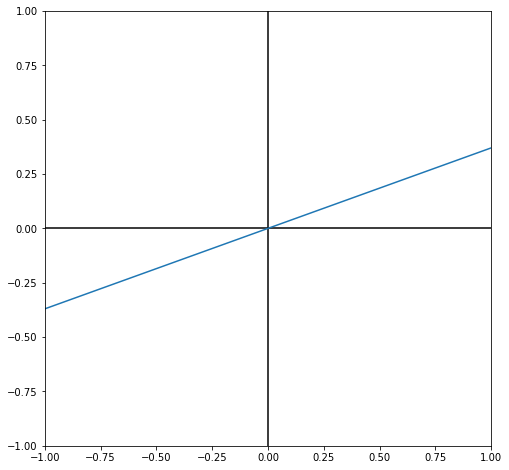

0.26394038671036746


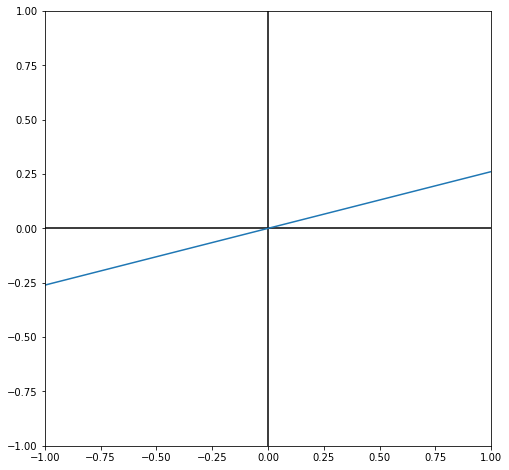

0.13293862262231404


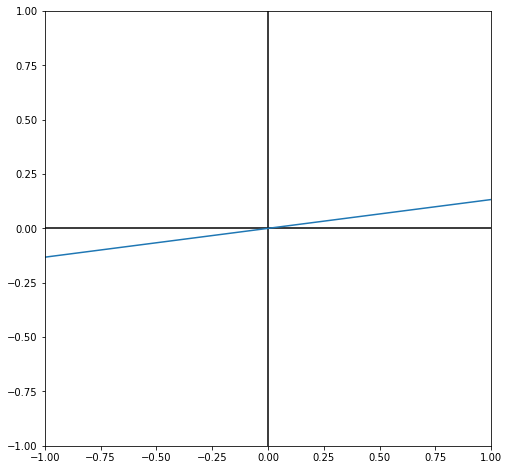

-0.01850348634737799


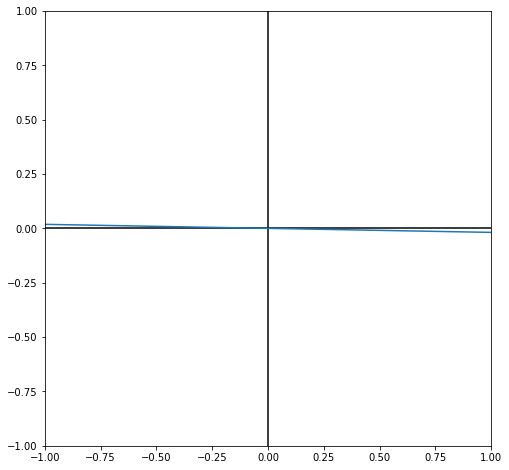

-0.1973091159187852


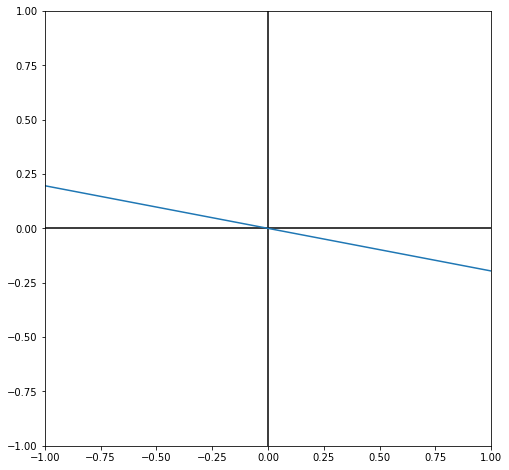

-0.4198983667038058


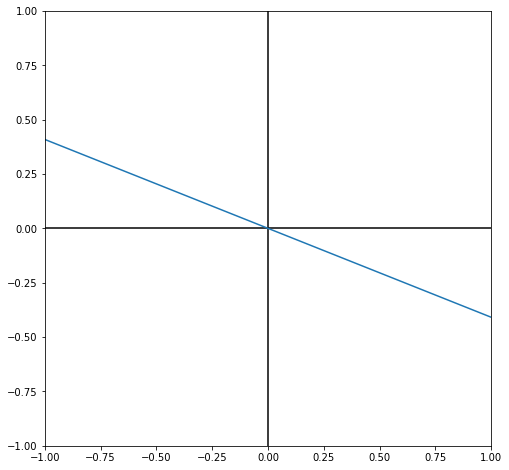

-0.4198983667038058

In [37]:
sin_fi = coin_fall(h, l, l_0, c)
sin_fi

In [38]:
result = get_coin_side(sin_fi, side)
result 

0